# Predicting German Credit Default
## Exploratorio

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Se buscan valores nulos para poder trabajar con ellos

In [2]:
## Se buscan valores nulos 
df = pd.read_csv('../Datasets/scored_data.csv', index_col=0)
df.isnull().sum()

age                   0
sex                   0
job                   0
housing               0
saving_accounts     183
checking_account    394
credit_amount         0
duration              0
purpose               0
risk                  0
dtype: int64

In [3]:
## usamos fillna para poder cambiar Nan a no_info
df['saving_accounts'] = df['saving_accounts'].fillna('no_info')
df['checking_account'] = df['checking_account'].fillna('no_info')
df.isnull().sum()

age                 0
sex                 0
job                 0
housing             0
saving_accounts     0
checking_account    0
credit_amount       0
duration            0
purpose             0
risk                0
dtype: int64

In [19]:
# Guardamos el DF como csv
df.to_csv("scored_data_no_null.csv")

In [4]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
unnamed:_0,,,,,,,,,,
0,67,male,2,own,no_info,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,no_info,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


## Variables numéricas 
### Edad (age)

In [5]:
df.age.describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

- La edad promedio es 35.5 años
- La edad minima es de 19 años
- La edad maxima es de 75 años 
- El Rango de edad es 56 años 
- El 25% de los datos tienen un valor menor a 27
- El 50% de los datos tienen un valor menor a 33 (mediana)
- El 75% de los datos tienen un valor menor a 42
- Rango intercuartilico: 15
- La desviación estándar es 11.37 (Los datos muy unidos)

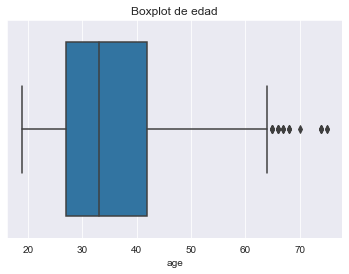

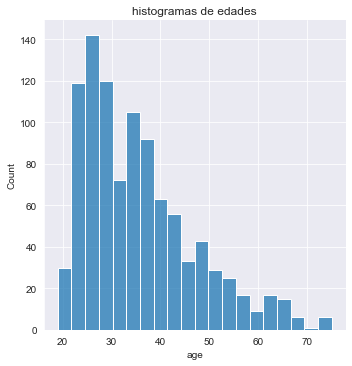

In [6]:
sns.set_style('darkgrid')

sns.boxplot(x=df['age'])
plt.title('Boxplot de edad')
plt.show()

sns.displot(df['age'], kde=False, bins=20)
plt.title('histogramas de edades')
plt.show();

- Los datos estan centrandos de lado izquierdo, podriamos decir que los créditos estan mas disponibles para los jovenes.
- Los clientes mayores de 60 años son atipicos 
- Los clientes se concentran en una edad de 25 a 40 años 

### Filtros 
Creamos filtros que nos ayudaran a identificar el perfil de los clientes 
- Poco riesgo (risk = good) 
- Mucho riesgo (risk = bad)

In [7]:
# Filtros
filtro_good = df['risk'] == 'good'
filtro_bad = df['risk'] == 'bad'

In [8]:
df[filtro_good].age.describe()

count    700.000000
mean      36.224286
std       11.381145
min       19.000000
25%       27.000000
50%       34.000000
75%       42.250000
max       75.000000
Name: age, dtype: float64

## Cuando el estado del cliente es de poco riesgo
- La edad promedio es 36.22 años
- La edad minima es de 19 años
- La edad maxima es de 75 años 
- El Rango de edad es 56 años 
- El 25% de los datos tienen un valor menor a 27
- El 50% de los datos tienen un valor menor a 34 (mediana)
- El 75% de los datos tienen un valor menor a 42
- Rango intercuartilico: 15
- La desviación estándar es 11.38 (Los datos muy unidos)

In [9]:
df[filtro_bad].age.describe()

count    300.000000
mean      33.963333
std       11.222379
min       19.000000
25%       25.000000
50%       31.000000
75%       40.000000
max       74.000000
Name: age, dtype: float64

## Cuando el estado del cliente es de riesgo 

- La edad promedio es 33.96 años
- La edad minima es de 19 años
- La edad maxima es de 74 años 
- El Rango de edad es 55 años 
- El 25% de los datos tienen un valor menor a 25
- El 50% de los datos tienen un valor menor a 31 (mediana)
- El 75% de los datos tienen un valor menor a 40
- Rango intercuartilico: 15
- La desviación estándar es 11.22 (Los datos muy unidos)

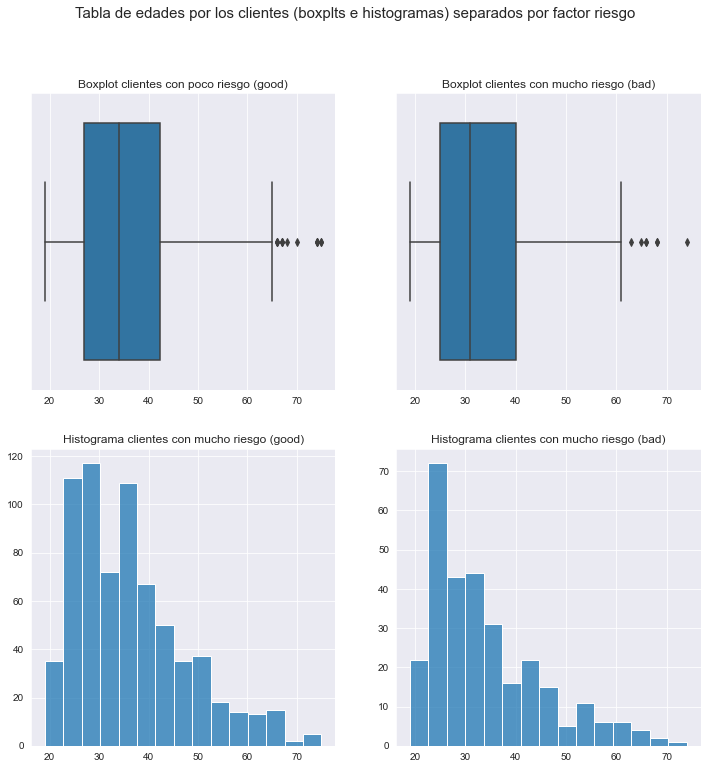

In [10]:
# graficas
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
sns.set_style('darkgrid')

# boxplots
sns.boxplot(x=df[filtro_good]['age'], ax=axes[0,0])
sns.boxplot(x=df[filtro_bad]['age'], ax=axes[0,1])

# histogramas
sns.histplot(df[filtro_good]['age'], kde=False, bins=15, ax=axes[1,0])
sns.histplot(df[filtro_bad]['age'], kde=False, bins=15, ax=axes[1,1])

# titulos 
axes[0, 0].set(xlabel='', ylabel='', title='Boxplot clientes con poco riesgo (good)')
axes[0, 1].set(xlabel='', ylabel='', title='Boxplot clientes con mucho riesgo (bad)')
axes[1, 0].set(xlabel='', ylabel='', title='Histograma clientes con mucho riesgo (good)')
axes[1, 1].set(xlabel='', ylabel='', title='Histograma clientes con mucho riesgo (bad)')

fig.suptitle('Tabla de edades por los clientes (boxplts e histogramas) separados por factor riesgo', fontsize=15);

- Los clientes grandes son atipicos en los dos casos 
- Los clientes con mayor riesgo son mas jovenes
- La distribución de las edades de los clientes son similares en los dos casos (good/bad).

### Monto de crédito (credit_amount)

In [11]:
df.credit_amount.describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64

- El promedio del monto de los créditos es 3,271.25
- El monto minimo solicitado es de 250.00
- EL monto maximo solicitado es de 18,424.00
- El Rango de los montos de credito es de 18,174.00
- El 25% de los datos tienen un valor menor a 13,65.50
- El 50% de los datos tienen un valor menor a 2,319.50 (mediana)
- El 75% de los datos tienen un valor menor a 3,972.25
- Rango intercuartilico: 2,606.75
- La desviación estándar es 2,822.73 (Los datos son muy dispersos)

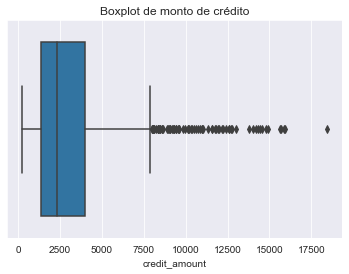

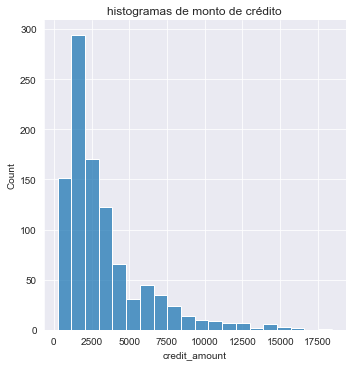

In [12]:
sns.set_style('darkgrid')

sns.boxplot(x=df['credit_amount'])
plt.title('Boxplot de monto de crédito')
plt.show()

sns.displot(df['credit_amount'], kde=False, bins=20)
plt.title('histogramas de monto de crédito')
plt.show();

- Crédito arriba de 7,500 son raros
- Los montos de crétos mas solicitados estan entre 2,500  y 3,500 
- Los créditos de mayor monto son para pocos clientes

In [13]:
df[filtro_good].credit_amount.describe()

count      700.000000
mean      2985.457143
std       2401.472278
min        250.000000
25%       1375.500000
50%       2244.000000
75%       3634.750000
max      15857.000000
Name: credit_amount, dtype: float64

## Cuando el estado del cliente es de poco riesgo

- El promedio del monto de los créditos es 2,985.45
- El monto minimo solicitado es de 250.00
- EL monto maximo solicitado es de 15,857.00
- El Rango de los montos de credito es de 18,174.00
- El 25% de los datos tienen un valor menor a 1,365.50
- El 50% de los datos tienen un valor menor a 2,224.00 (mediana)
- El 75% de los datos tienen un valor menor a 3,634.75
- Rango intercuartilico: 2,269.25
- La desviación estándar es 15,857.00 (Los datos son muy dispersos)

In [14]:
df[filtro_bad].credit_amount.describe()

count      300.000000
mean      3938.126667
std       3535.818955
min        433.000000
25%       1352.500000
50%       2574.500000
75%       5141.500000
max      18424.000000
Name: credit_amount, dtype: float64

## Cuando el estado del cliente es de riesgo 

- El promedio del monto de los créditos es 3,938.12
- El monto minimo solicitado es de 4,33.00
- EL monto maximo solicitado es de 18,424.00
- El Rango de los montos de credito es de 17,991.00
- El 25% de los datos tienen un valor menor a 1,352.50
- El 50% de los datos tienen un valor menor a 2,574.50 (mediana)
- El 75% de los datos tienen un valor menor a 5,141.50
- Rango intercuartilico: 3,789.00
- La desviación estándar es 18424.00 (Los datos son muy dispersos)

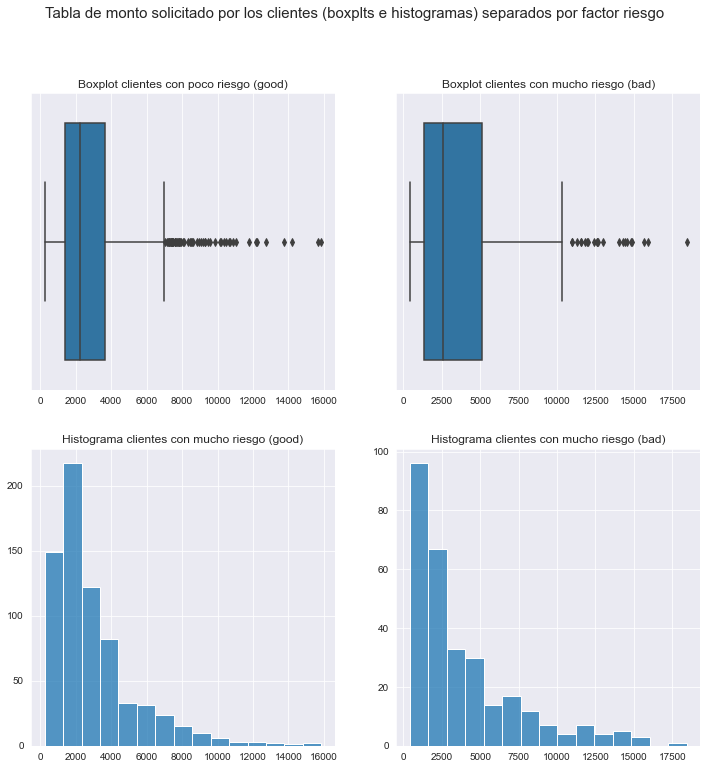

In [15]:
# graficas
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
sns.set_style('darkgrid')

# boxplots
sns.boxplot(x=df[filtro_good]['credit_amount'], ax=axes[0,0])
sns.boxplot(x=df[filtro_bad]['credit_amount'], ax=axes[0,1])

# histogramas
sns.histplot(df[filtro_good]['credit_amount'], kde=False, bins=15, ax=axes[1,0])
sns.histplot(df[filtro_bad]['credit_amount'], kde=False, bins=15, ax=axes[1,1])

# titulos 
axes[0, 0].set(xlabel='', ylabel='', title='Boxplot clientes con poco riesgo (good)')
axes[0, 1].set(xlabel='', ylabel='', title='Boxplot clientes con mucho riesgo (bad)')
axes[1, 0].set(xlabel='', ylabel='', title='Histograma clientes con mucho riesgo (good)')
axes[1, 1].set(xlabel='', ylabel='', title='Histograma clientes con mucho riesgo (bad)')

fig.suptitle('Tabla de monto solicitado por los clientes (boxplts e histogramas) separados por factor riesgo', fontsize=15);

- Los clientes con un monto mayor (outliers) con perfil de poco riesgo son mayores que los de mucho riesgo.

### Tiempo del crédito solícitado  (duration)

In [16]:
df.duration.describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: duration, dtype: float64

- El promedio la duración del crédito  es 20.90 meses 
- La duración minima solicitada es de 4 meses
- La duración maximo solicitada es de 72 meses
- El Rango de la duración del crédito es de 68
- El 25% de los datos tienen un valor menor a 12.00
- El 50% de los datos tienen un valor menor a 18.00 (mediana)
- El 75% de los datos tienen un valor menor a 24.00
- Rango intercuartilico: 12 
- La desviación estándar es 12.058 (Los datos no son dispersos)

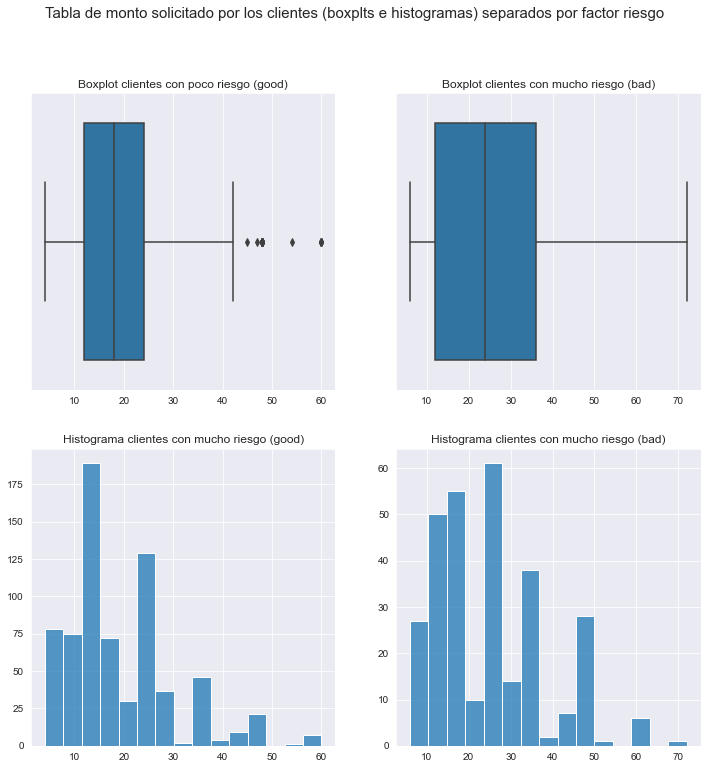

In [17]:
# graficas
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
sns.set_style('darkgrid')

# boxplots
sns.boxplot(x=df[filtro_good]['duration'], ax=axes[0,0])
sns.boxplot(x=df[filtro_bad]['duration'], ax=axes[0,1])

# histogramas
sns.histplot(df[filtro_good]['duration'], kde=False, bins=15, ax=axes[1,0])
sns.histplot(df[filtro_bad]['duration'], kde=False, bins=15, ax=axes[1,1])

# titulos 
axes[0, 0].set(xlabel='', ylabel='', title='Boxplot clientes con poco riesgo (good)')
axes[0, 1].set(xlabel='', ylabel='', title='Boxplot clientes con mucho riesgo (bad)')
axes[1, 0].set(xlabel='', ylabel='', title='Histograma clientes con mucho riesgo (good)')
axes[1, 1].set(xlabel='', ylabel='', title='Histograma clientes con mucho riesgo (bad)')

fig.suptitle('Tabla de monto solicitado por los clientes (boxplts e histogramas) separados por factor riesgo', fontsize=15);

### Variables categóricas
### Modas de variables 

In [19]:
# Creamos variable con una lista de las varibales categoricas de DF 
list_categorias = ['age', 'sex', 'job', 'housing','saving_accounts','duration','purpose']

In [20]:
df.mode().head(1)[list_categorias]

,age,sex,job,housing,saving_accounts,duration,purpose
0,27.0,male,2.0,own,little,24.0,car


### Moda varariables clientes poco riesgo

In [21]:
df[filtro_good].mode().head(1)[list_categorias]

,age,sex,job,housing,saving_accounts,duration,purpose
0,27.0,male,2.0,own,little,12.0,car


### Moda varariables clientes de riesgo

In [22]:
df[filtro_bad].mode().head(1)[list_categorias]

,age,sex,job,housing,saving_accounts,duration,purpose
0,23.0,male,2.0,own,little,24.0,car


- La mayoria de los clietes son de 27 años siento tambien la mayoria de los clientes de poco riesgo
- la mayoria de los clietes tienen trabajo de tipo 2 (En general y en clasificacion de cliente)
- la mayoria de los clietes cuenta con pocos ahorros (En general y en clasificacion de cliente)
- la mayoria de los clietes usan el crédito para comprar un automovil (En general y en clasificacion de cliente)

## Crosstab

In [23]:
ct_job =pd.crosstab(df['risk'],[df['sex'],df['job']],margins=True,margins_name='total')
ct_job 

sex   female              male                total
job        0   1    2   3    0    1    2    3      
risk                                               
bad        5  22   66  16    2   34  120   35   300
good       7  42  131  21    8  102  313   76   700
total     12  64  197  37   10  136  433  111  1000

- Los clientes con el trabajo tipo 2 sin importar si es femenino o masculino tienen la mayor cantidad de clientes de perfil de alto riesgo

In [24]:
ct_housing  = pd.crosstab(df['risk'],[df['sex'],df['housing']],margins=True,margins_name='total')
ct_housing

sex     female           male           total
housing   free  own rent free  own rent      
risk                                         
bad         11   59   39   33  127   31   300
good         8  137   56   56  390   53   700
total       19  196   95   89  517   84  1000

- Los clientes con casa propia son los que tienen la mayoria de los casos de alto riesgo en ambos casos (Masculinos y femeninos) , esto podría no ser un indicador optimo, ya que esto nos indica nada as que el cliente tiene propiedades a su nombre y no su calidad como pagador a sus deudas.

In [25]:
ct_saving = pd.crosstab(df['risk'],[df['sex'],df['saving_accounts']],margins=True,margins_name='total')
ct_saving

sex             female                                    male           \
saving_accounts little moderate no_info quite rich rich little moderate   
risk                                                                      
bad                 76       15      13          4    1    141       19   
good               118       17      36         12   18    268       52   
total              194       32      49         16   19    409       71   

sex                                     total  
saving_accounts no_info quite rich rich        
risk                                           
bad                  19          7    5   300  
good                115         40   24   700  
total               134         47   29  1000

- En este caso en ambos casos los clientes con una cuenta pequeña de ahorros tienen un perfil de alto riesgo.
- Los hombres tienen a mayor tendencia a tener un perfil de alto riesgo.

In [26]:
ct_account = pd.crosstab(df['risk'],[df['sex'],df['checking_account']],margins=True,margins_name='total')
ct_account

sex              female                         male                        \
checking_account little moderate no_info rich little moderate no_info rich   
risk                                                                         
bad                  46       41      18    4     89       64      28   10   
good                 42       45      98   16     97      119     250   33   
total                88       86     116   20    186      183     278   43   

sex              total  
checking_account        
risk                    
bad                300  
good               700  
total             1000

# VIz de algunos datos

In [27]:
df.columns

Index(['age', 'sex', 'job', 'housing', 'saving_accounts', 'checking_account',
       'credit_amount', 'duration', 'purpose', 'risk'],
      dtype='object')

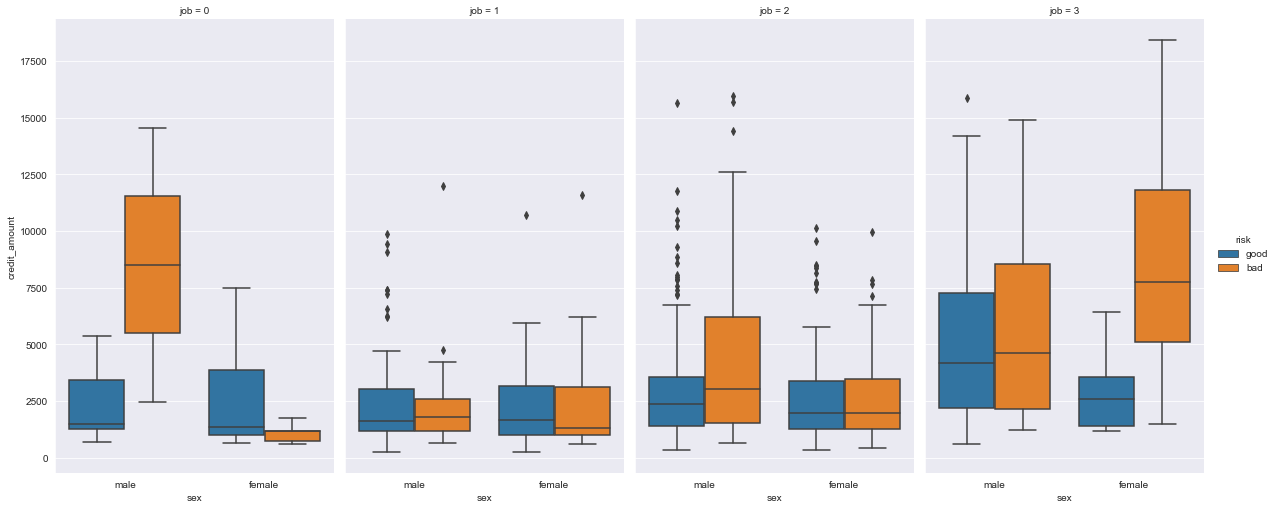

In [39]:
sns.catplot(x="sex", y="credit_amount", 
            hue="risk", col="job", 
            data=df, kind="box", 
            height=7, aspect=.6);

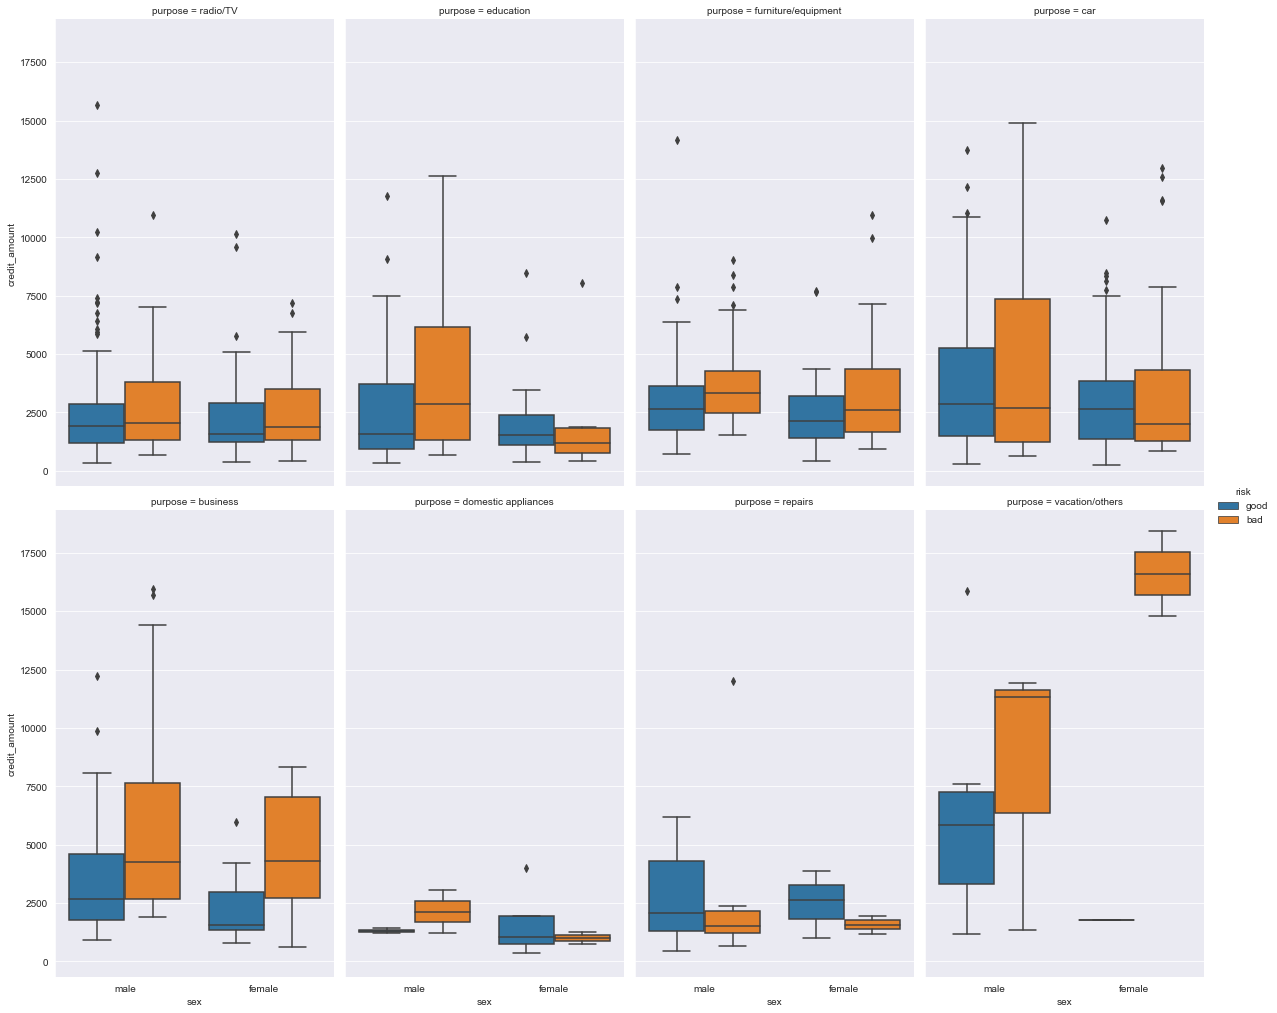

In [38]:
sns.catplot(x="sex", y="credit_amount",
            hue="risk", col="purpose", 
            data=df, kind="box",
            height=7, aspect=.6, 
            col_wrap= 4);

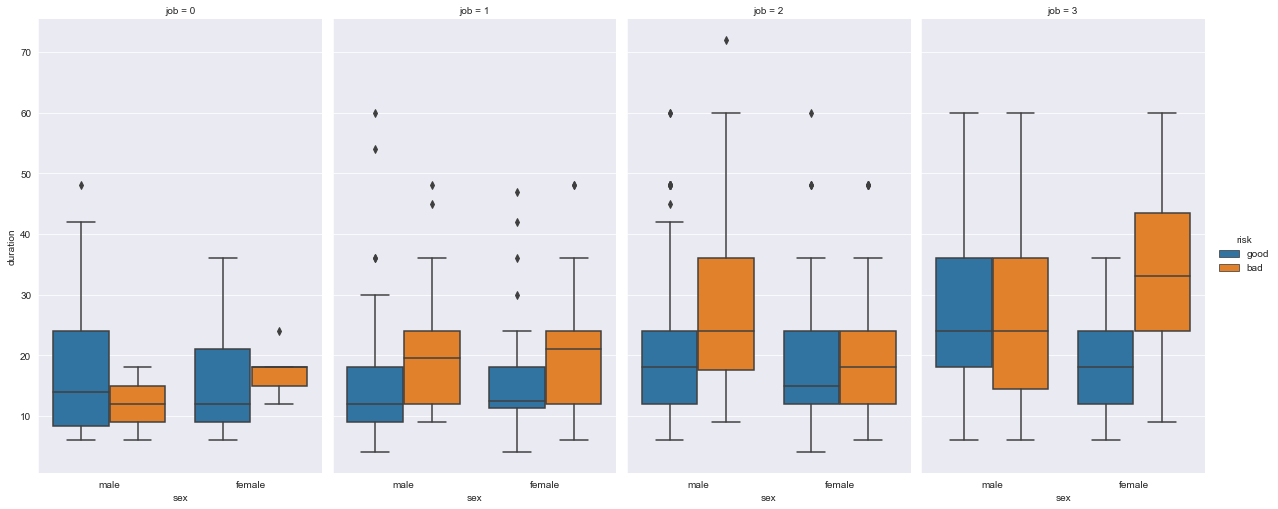

In [40]:
sns.catplot(x="sex", y="duration", 
            hue="risk", col="job", 
            data=df, kind="box", 
            height=7, aspect=.6);

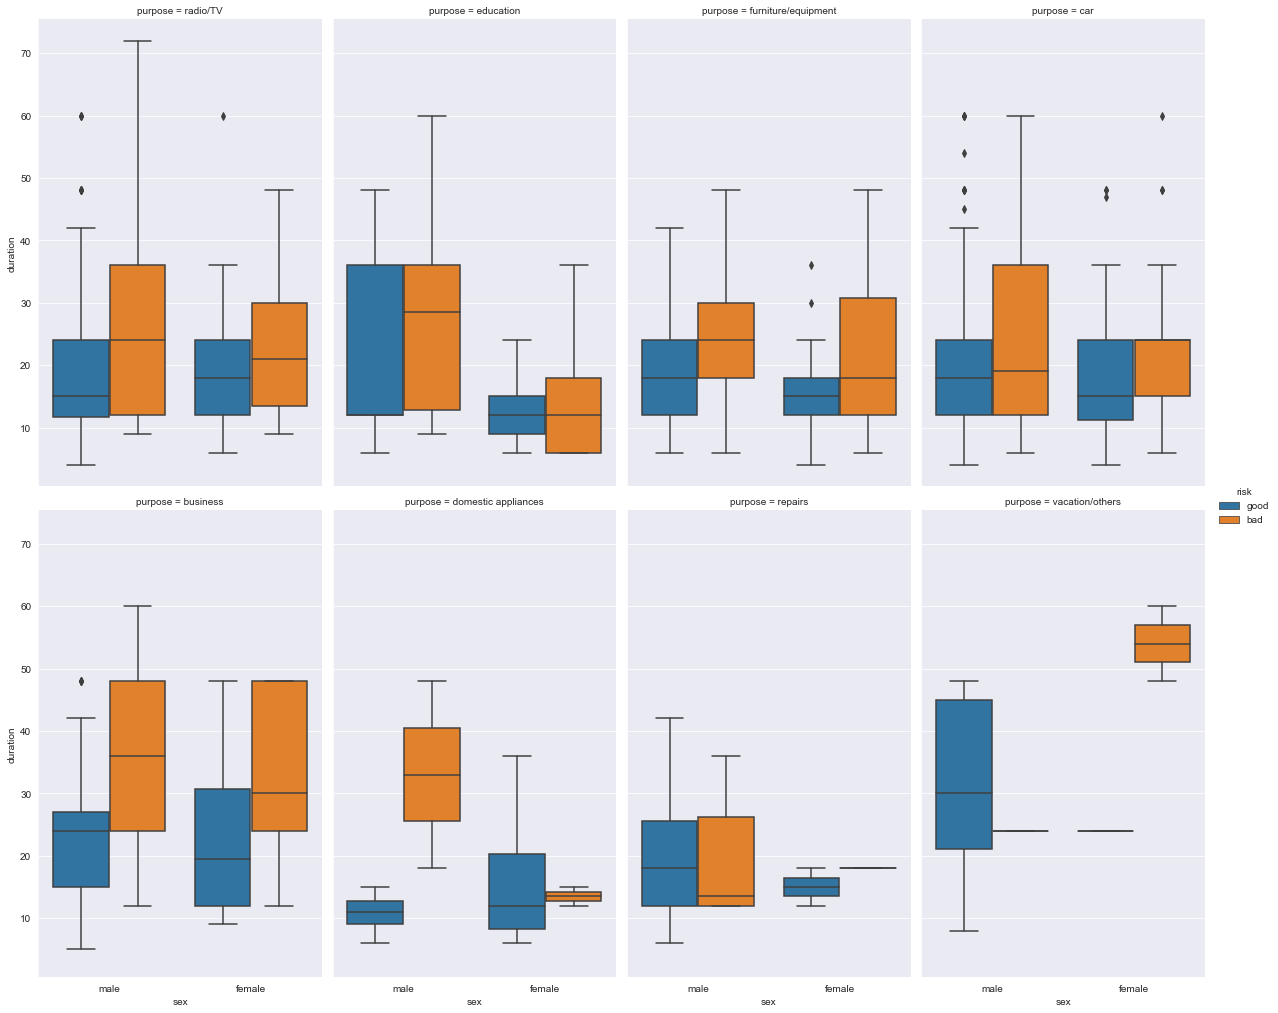

In [41]:
sns.catplot(x="sex", y="duration",
            hue="risk", col="purpose", 
            data=df, kind="box",
            height=7, aspect=.6, 
            col_wrap= 4);